# Semi supervised learning

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from weights import NearestNeighbors, KernelComputer
np.random.seed(0)

In [2]:
%matplotlib inline
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
# plt.rc('text', usetex=True)

## Real Simulation

In [3]:
nb = 2000

def get_trainset(nb):
    theta = 2 * np.pi * np.random.rand(nb)
    cluster = np.random.choice(4, nb) + 1
    x = cluster * np.cos(theta)
    y = cluster * np.sin(theta)
    y1 = 2
    x1 = -2*np.sqrt(3)
    x2 = 1
    y2 = -2*np.sqrt(2)
    y3 = -1
    x3 = -np.sqrt(3)
    x4 = -1
    y4 = 0
    x_train = np.vstack((np.hstack((x, x1, x2, x3, x4)), np.hstack((y, y1, y2, y3, y4)))).T
    s_train = np.zeros((x_train.shape[0], 4))
    s_train[-1, 3] = 1
    s_train[-2, 2] = 1
    s_train[-3, 1] = 1
    s_train[-4, 0] = 1
    return x_train, s_train

x_train, s_train = get_trainset(nb)

In [4]:
def get_y_dis(s_train, alpha, verbose=False):
    tmp = s_train
    tmp_old = np.zeros(tmp.shape, tmp.dtype)
    i = 0
    while (tmp != tmp_old).any():
        i += 1
        tmp_old = tmp
        tmp = alpha @ tmp
        tmp = (tmp == tmp.max(axis=1)[:, np.newaxis]).astype(np.float)
    if verbose:
        print(i)
    return tmp

In [5]:
k = 20
computer = NearestNeighbors(k)
computer.set_support(x_train)
alpha = computer(x_train)
y_dis = get_y_dis(s_train, alpha, verbose=True)

30


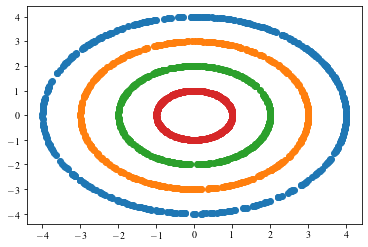

In [6]:
for i in range(4):
    ind = y_dis.argmax(axis=1) == i
    plt.scatter(x_train[ind][:, 0], x_train[ind][:, 1])

In [7]:
def get_x_test(num):
    x = np.linspace(-4.5, 4.5, num)
    x_test = np.meshgrid(x, x)
    x_test = np.vstack((x_test[0].reshape(-1), x_test[1].reshape(-1))).T
    return x_test

In [8]:
computer = KernelComputer('Gaussian', sigma = .2)
computer.set_support(x_train)

In [11]:
x_test = get_x_test(50)
alpha = computer(x_test)
y_pred_il = np.argmax(alpha.T @ s_train, axis=1)
y_pred_df = np.argmax(alpha.T @ y_dis, axis=1)

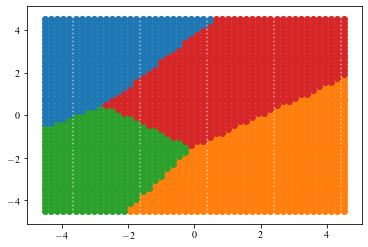

In [12]:
for i in range(4):
    ind = y_pred_il == i
    plt.scatter(x_test[ind][:, 0], x_test[ind][:, 1])

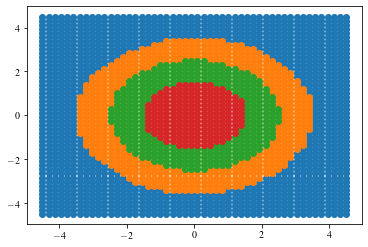

In [13]:
for i in range(4):
    ind = y_pred_df == i
    plt.scatter(x_test[ind][:, 0], x_test[ind][:, 1])

## Clean reproduction

In [15]:
np.random.seed(0)

In [16]:
theta = 2 * np.pi * np.random.rand(nb)
cluster = np.random.choice(4, nb) + 1
x = cluster * np.cos(theta)
y = cluster * np.sin(theta)
y1 = 2 
x1 = -2*np.sqrt(3)
x2 = 1
y2 = -2*np.sqrt(2)
y3 = -1
x3 = -np.sqrt(3)
x4 = -1
y4 = 0

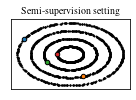

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(2, 1.5)) 

a = ax.scatter(x, y, color='k', s=1, zorder=2)
b = ax.scatter(x1, y1, color='C0', s=20, edgecolor='k', zorder=2)
c = ax.scatter(x2, y2, color='C1', s=20, edgecolor='k', zorder=2)
d = ax.scatter(x3, y3, color='C2', s=20, edgecolor='k', zorder=2)
e = ax.scatter(x4, y4, color='C3', s=20, edgecolor='k', zorder=2)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
# ax.legend([a, c], ['unlabelled data', 'labelled data'], loc='upper right', prop={'size': 8}, ncol=1) 
ax.tick_params(axis='both', which='major', labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Semi-supervision setting', size=10)
plt.tight_layout()
fig.savefig('savings/ss/setting.pdf')

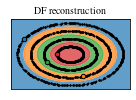

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(2, 1.5)) 

alpha = .7
ax.set_facecolor((31 / 255, 119 / 255, 180 / 255, alpha))
c2_blk = plt.Circle((0, 0), 3.5, color='w', alpha=1, zorder=1)
c2 = plt.Circle((0, 0), 3.5, color='C1', alpha=alpha, zorder=1)
c3_blk = plt.Circle((0, 0), 2.5, color='w', alpha=1, zorder=1)
c3 = plt.Circle((0, 0), 2.5, color='C2', alpha=alpha, zorder=1)
c4_blk = plt.Circle((0, 0), 1.5, color='w', alpha=1, zorder=1)
c4 = plt.Circle((0, 0), 1.5, color='C3', alpha=alpha, zorder=1)

ax.add_patch(c2_blk)
a = ax.add_patch(c2)
ax.add_patch(c3_blk)
ax.add_patch(c3)
ax.add_patch(c4_blk)
ax.add_patch(c4)

ax.scatter(x, y, color='k', s=1, zorder=2)
ax.scatter(x1, y1, color='C0', s=20, edgecolor='k', zorder=2)
ax.scatter(x2, y2, color='C1', s=20, edgecolor='k', zorder=2)
ax.scatter(x3, y3, color='C2', s=20, edgecolor='k', zorder=2)
ax.scatter(x4, y4, color='C3', s=20, edgecolor='k', zorder=2)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
# ax.legend([a], ['decision region'], loc='upper right', prop={'size': 8}) 
ax.tick_params(axis='both', which='major', labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'DF reconstruction', size=10)
plt.tight_layout()
fig.savefig('savings/ss/df.pdf')

In [19]:
r1, r2, r3, r4 = 4, 3, 2, 1

x_1, x_2, x_3 = x1, x3, x4
y_1, y_2, y_3 = y1, y3, y4
r_1, r_2, r_3 = r1, r3, r4

A = np.array([[1, 2*x_1, 2*y_1], [1, 2*x_2, 2*y_2], [1, 2*x_3, 2*y_3]])
b = np.array([r_1**2, r_2**2, r_3**2])

_, x134, y134 = np.linalg.solve(A, b)

x_1, x_2, x_3 = x2, x3, x4
y_1, y_2, y_3 = y2, y3, y4
r_1, r_2, r_3 = r2, r3, r4

A = np.array([[1, 2*x_1, 2*y_1], [1, 2*x_2, 2*y_2], [1, 2*x_3, 2*y_3]])
b = np.array([r_1**2, r_2**2, r_3**2])

_, x234, y234 = np.linalg.solve(A, b)

In [20]:
x13 = -4.5
x24 = 4.5
y23 = -4.5
y14 = 4.5

y13 = (r3**2 - r1**2 - 2 * x13 * (x3 - x1)) / (2* (y3 - y1))
y24 = (r4**2 - r2**2 - 2 * x24 * (x4 - x2)) / (2* (y4 - y2))
x23 = (r3**2 - r2**2 - 2 * y23 * (y3 - y2)) / (2* (x3 - x2))
x14 = (r4**2 - r1**2 - 2 * y14 * (y4 - y1)) / (2* (x4 - x1))

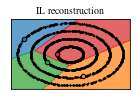

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(2, 1.5))

alpha = .7
c1 = Polygon(np.array([[-4.5,4.5], [x13, y13], [x134, y134], [x14, y14]]), color='C0', alpha=alpha, zorder=1)
c2 = Polygon(np.array([[4.5,-4.5], [x23, y23], [x234, y234], [x24, y24]]), color='C1', alpha=alpha, zorder=1)
c3 = Polygon(np.array([[-4.5,-4.5], [x13, y13], [x134, y134], [x234, y234], [x23, y23]]), color='C2', alpha=alpha, zorder=1)
c4 = Polygon(np.array([[4.5,4.5], [x14, y14], [x134, y134], [x234, y234], [x24, y24]]), color='C3', alpha=alpha, zorder=1)

ax.add_patch(c1)
ax.add_patch(c2)
ax.add_patch(c3)
ax.add_patch(c4)

ax.scatter(x, y, color='k', s=1, zorder=2)
ax.scatter(x1, y1, color='C0', s=20, edgecolor='k', zorder=2)
ax.scatter(x2, y2, color='C1', s=20, edgecolor='k', zorder=2)
ax.scatter(x3, y3, color='C2', s=20, edgecolor='k', zorder=2)
ax.scatter(x4, y4, color='C3', s=20, edgecolor='k', zorder=2)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
# ax.legend([a], ['decision region'], loc='upper right', prop={'size': 8}) 
# ax.tick_params(axis='both', which='major', labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'IL reconstruction', size=10)
plt.tight_layout()
fig.savefig('savings/ss/il.pdf')